In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df['Potability'].unique()

array([0, 1])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hardness', ylabel='Density'>

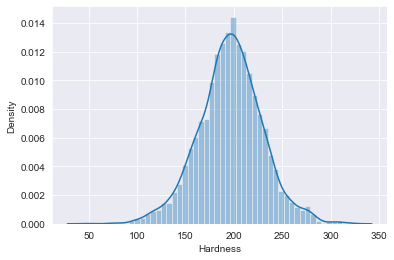

In [6]:
sns.set_style('darkgrid')
sns.distplot(df['Hardness'])

In [7]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<AxesSubplot:>

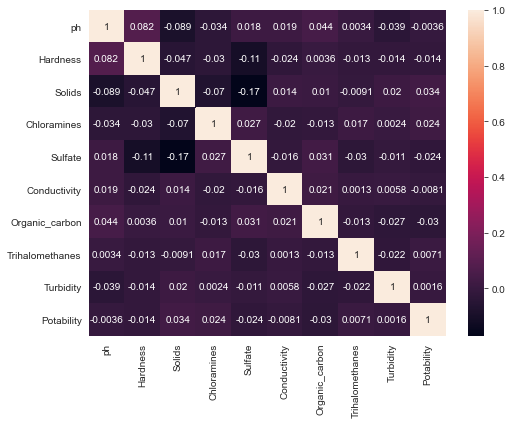

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

# cleaning the data

<AxesSubplot:>

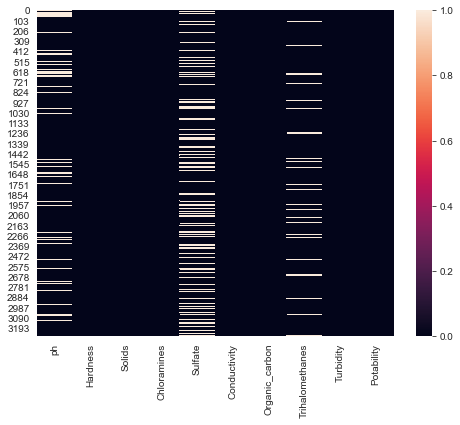

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df['ph'].fillna(df['ph'].mean(),inplace=True)

In [12]:
df['Sulfate'].fillna(df['Sulfate'].mean(),inplace=True)

In [13]:
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(),inplace=True)

<AxesSubplot:>

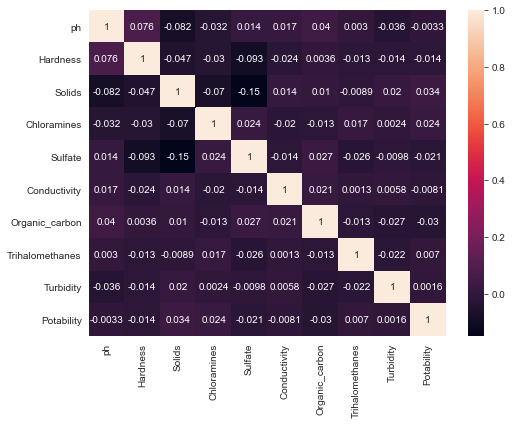

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [15]:
x=df[['ph','Hardness','Solids','Chloramines','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y=df['Potability']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr=LogisticRegression()

In [20]:
lr.fit(x_train,y_train)

LogisticRegression()

In [21]:
x_test.iloc[0]

ph                    7.130099
Hardness            275.679780
Solids             9480.617796
Chloramines           8.415948
Conductivity        383.455068
Organic_carbon       18.322879
Trihalomethanes      94.416301
Turbidity             1.986192
Name: 1790, dtype: float64

In [22]:
y_test.iloc[0]

0

In [23]:
lr.predict([[7.213537,176.640063,34727.408564,5.162278,332.199507,10.327476,77.261468,3.497481]])

array([0])

In [24]:
lr.predict_proba([[7.213537,176.640063,34727.408564,5.162278,332.199507,10.327476,77.261468,3.497481]])

array([[0.59563148, 0.40436852]])

In [25]:
predictions=lr.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
from sklearn import metrics

In [27]:
metrics.confusion_matrix(y_test,predictions)

array([[602,   0],
       [381,   0]])

In [28]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       602
           1       0.00      0.00      0.00       381

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.38      0.61      0.47       983



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [29]:
probability = lr.predict_proba(x_test)

In [30]:
list(probability)

[array([0.60881007, 0.39118993]),
 array([0.61673811, 0.38326189]),
 array([0.62571283, 0.37428717]),
 array([0.60826047, 0.39173953]),
 array([0.62075079, 0.37924921]),
 array([0.6274977, 0.3725023]),
 array([0.62345192, 0.37654808]),
 array([0.60918898, 0.39081102]),
 array([0.59531393, 0.40468607]),
 array([0.58660323, 0.41339677]),
 array([0.59166316, 0.40833684]),
 array([0.60181837, 0.39818163]),
 array([0.6167468, 0.3832532]),
 array([0.59344686, 0.40655314]),
 array([0.59756496, 0.40243504]),
 array([0.62278515, 0.37721485]),
 array([0.59317068, 0.40682932]),
 array([0.61571948, 0.38428052]),
 array([0.60637488, 0.39362512]),
 array([0.61005835, 0.38994165]),
 array([0.58845427, 0.41154573]),
 array([0.58064353, 0.41935647]),
 array([0.63662623, 0.36337377]),
 array([0.60251888, 0.39748112]),
 array([0.59283949, 0.40716051]),
 array([0.62183748, 0.37816252]),
 array([0.60540337, 0.39459663]),
 array([0.60775239, 0.39224761]),
 array([0.58221313, 0.41778687]),
 array([0.62753166

In [31]:
import pickle
pickle.dump(lr, open('LR Model.pkl', 'wb'))

In [32]:
loadedModel = pickle.load(open('LR Model.pkl', 'rb'))

In [33]:
x

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,392.449580,19.903225,66.396293,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658


In [34]:
loadedModel.predict([[5, 200, 50000, 8, 500, 15, 100, 5]])

array([0])

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
Knn=KNeighborsClassifier(n_neighbors=7)

In [37]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
predictions=Knn.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68       602
           1       0.41      0.29      0.34       381

    accuracy                           0.56       983
   macro avg       0.52      0.51      0.51       983
weighted avg       0.54      0.56      0.54       983



In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
ks=list(range(1,600,2))

In [53]:
cvScores = []
for k in ks:
    testKNN = KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(testKNN, x, y, cv=5, scoring='accuracy').mean()
    cvScores.append(score)

In [54]:
cvScores

[0.5445652578663192,
 0.5412083410910444,
 0.5482261217650344,
 0.5543357847700614,
 0.5610505492459505,
 0.5598352262148575,
 0.5689852913796314,
 0.578451405697263,
 0.5848566374976727,
 0.5860780115434742,
 0.587605194563396,
 0.5863870787562837,
 0.5931041705455222,
 0.5909658350400299,
 0.5998212623347607,
 0.5970736361943773,
 0.593714857568423,
 0.5973785142431577,
 0.5934090485943028,
 0.5955455222491156,
 0.5979882703407187,
 0.5961585365853658,
 0.5976829268292683,
 0.5976819959039285,
 0.5970717743436976,
 0.59890336994973,
 0.5982926829268294,
 0.600430087506982,
 0.6028719046732453,
 0.6022621485756843,
 0.6040942096443865,
 0.6059248743250791,
 0.6077564699311115,
 0.6059239433997393,
 0.6068395084714207,
 0.6037888661329361,
 0.6047048966672873,
 0.605925339787749,
 0.6050074474027183,
 0.60653463042264,
 0.6062292869111896,
 0.6056172035002793,
 0.6074478681809719,
 0.6077532116924222,
 0.6077541426177622,
 0.609280394712344,
 0.6101954943213554,
 0.6095857382237945,
 0

In [55]:
max(cvScores)

0.6101954943213554

In [56]:
cvScores.index(max(cvScores))

46

In [57]:
ks[47]

95

In [58]:
finalKNN=KNeighborsClassifier(n_neighbors=95)
finalKNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=95)

In [59]:
import pickle

In [60]:
pickle.dump(finalKNN,open('KNN Model.pkl','wb'))

In [61]:
loadedModel = pickle.load(open('KNN Model.pkl','rb'))

In [62]:
loadedModel.predict([[5, 200, 50000, 8, 500, 15, 100, 5]])

array([0])